In [1]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/kexin516/baseball-salary-prediction-DecisionTree/main/Baseball_salary.csv')

In [5]:
dataset.shape

(322, 21)

In [7]:
dataset.isnull().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [11]:
# remove null elements in data
dataset = dataset.dropna()
# check to see if there is any nulls left
dataset.isnull().sum()

Unnamed: 0    0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
dtype: int64

In [13]:
dataset = dataset.drop(columns=['Unnamed: 0'])

In [15]:
dataset.shape

(263, 20)

In [17]:
# log tranform Salary
array = np.log(dataset['Salary'].values)
dataset.loc[:,'SalaryLog'] = pd.Series(array, index=dataset.index)
dataset = dataset.drop(columns=['Salary'])
dataset = dataset.dropna()

In [19]:
# Check the data type of each column
print(dataset.dtypes)

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
NewLeague     object
SalaryLog    float64
dtype: object


In [21]:
# Remove categorical columns (those with data type 'object')
dataset = dataset.select_dtypes(exclude=['object'])

In [23]:
dataset.head(20)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,SalaryLog
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,6.163315
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,6.214608
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,6.620073
6,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,4.248495
7,298,73,0,24,24,7,3,509,108,0,41,37,12,121,283,9,4.605170
8,323,81,6,26,32,8,2,341,86,6,32,34,8,143,290,19,4.317488
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,7.003065
10,574,159,21,107,75,59,10,4631,1300,90,702,504,488,238,445,22,6.248319


In [25]:
dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,SalaryLog
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,5.927222
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,0.889192
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,4.212128
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,5.247024
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,6.052089
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,6.620073
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,7.807917


In [27]:
# Calculate correlations
correlation_matrix = dataset.corr()

pd.set_option('display.max_columns', None)
print(correlation_matrix)

              AtBat      Hits     HmRun      Runs       RBI     Walks  \
AtBat      1.000000  0.963969  0.555102  0.899829  0.796015  0.624448   
Hits       0.963969  1.000000  0.530627  0.910630  0.788478  0.587311   
HmRun      0.555102  0.530627  1.000000  0.631076  0.849107  0.440454   
Runs       0.899829  0.910630  0.631076  1.000000  0.778692  0.697015   
RBI        0.796015  0.788478  0.849107  0.778692  1.000000  0.569505   
Walks      0.624448  0.587311  0.440454  0.697015  0.569505  1.000000   
Years      0.012725  0.018598  0.113488 -0.011975  0.129668  0.134793   
CAtBat     0.207166  0.206678  0.217464  0.171811  0.278126  0.269450   
CHits      0.225341  0.235606  0.217496  0.191327  0.292137  0.270795   
CHmRun     0.212422  0.189364  0.492526  0.229701  0.442190  0.349582   
CRuns      0.237278  0.238896  0.258347  0.237831  0.307226  0.332977   
CRBI       0.221393  0.219384  0.349858  0.202335  0.387777  0.312697   
CWalks     0.132926  0.122971  0.227183  0.163700  

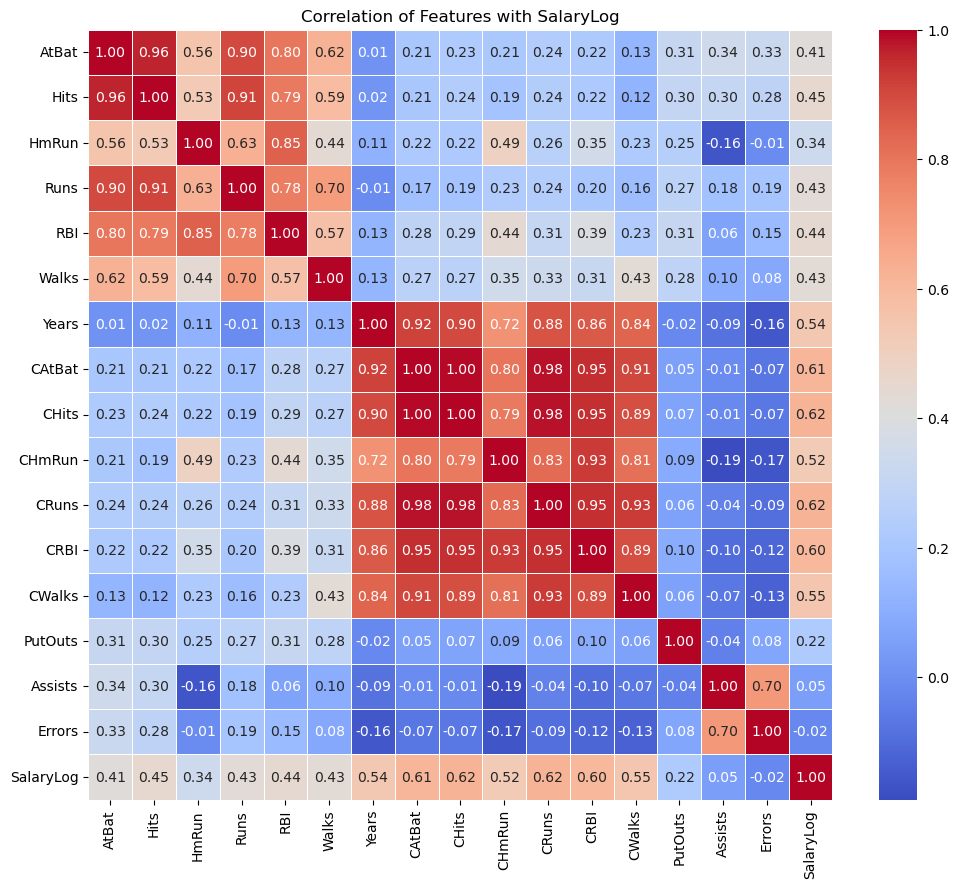

In [29]:
# Plot the heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Features with SalaryLog')
plt.show()

In [31]:
# Pick six features as input, based on their correlation with the target, and also avoid extremely high correlation between features
# Define X and y
X = dataset.loc[:,['Years', 'CAtBat', 'CRuns', 'CRBI', 'CWalks', 'Hits']] 
y = dataset['SalaryLog']

In [33]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
# Regression decision tree model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [103]:
# Measure variance: Perform predictions on the test data
y_pred = regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
166,6.461468,6.437752
249,6.189290,6.214608
294,5.220356,5.521461
9,7.003065,6.597600
190,5.310740,5.347108
213,4.605170,4.700480
74,6.838762,6.650710
311,6.263398,6.052089
163,7.788419,7.170120
195,6.684612,6.715383


In [105]:
# Calculate test error (variance)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.342908379076248
Mean Squared Error: 0.24151254516203835
Root Mean Squared Error: 0.49143925887340173


In [107]:
# Measure bias: Perform predictions on the training data
y_train_pred = regressor.predict(X_train)
# Calculate training error (bias)
print('Training Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Training Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Training Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Training Mean Absolute Error: 0.0
Training Mean Squared Error: 0.0
Training Root Mean Squared Error: 0.0


In [143]:
# Plot decision tree
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Image(graph.create_png()) # do not show it because cannot export pdf with this png image

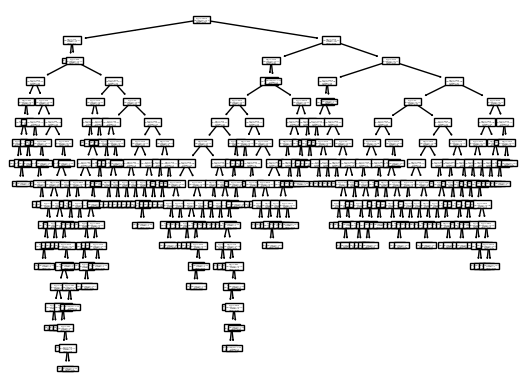

In [111]:
# Another way to plot
tree.plot_tree(regressor)
plt.show()

In [113]:
tree_depth = regressor.get_depth()
print(f"The depth of the decision tree is: {tree_depth}")

The depth of the decision tree is: 17


In [115]:
# This default decision tree has 17 levels.

In [117]:
# Another decision tree model with depth of 2
regressor2 = DecisionTreeRegressor(max_depth=2, random_state=0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [77]:
# Measure variance
y_pred2 = regressor2.predict(X_test) 
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})  
df2

,Actual,Predicted
166,6.461468,6.641191
249,6.189290,6.085002
294,5.220356,4.973739
9,7.003065,6.085002
190,5.310740,4.973739
213,4.605170,4.973739
74,6.838762,6.641191
311,6.263398,6.085002
163,7.788419,6.641191
195,6.684612,6.085002


In [119]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.4692076723499114
Mean Squared Error: 0.32509436760682897
Root Mean Squared Error: 0.5701704724087604


In [121]:
# Measure bias
y_train_pred2 = regressor2.predict(X_train)

print('Training Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred2))  
print('Training Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred2))  
print('Training Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2)))

Training Mean Absolute Error: 0.3771852524422619
Training Mean Squared Error: 0.24105710662172306
Training Root Mean Squared Error: 0.4909756680546634


In [141]:
#Plot tree
dot_data = StringIO()
export_graphviz(regressor2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Image(graph.create_png()) # do not show it because cannot export pdf with this png image

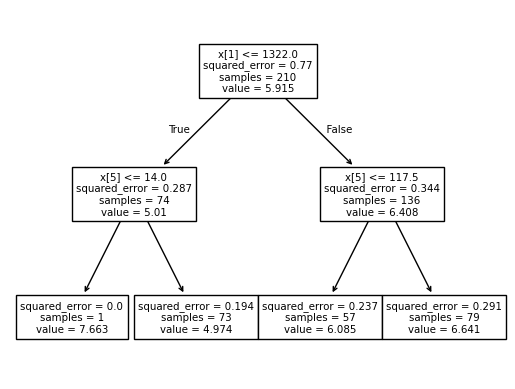

In [127]:
# Another way to plot
tree.plot_tree(regressor2)
plt.show()

In [129]:
# By comparing both the training and test errors between the two models:
# Model with 17 levels (default tree depth) has high variance (overfitting, perform worse on unseen data) and low bias (fit training data well).
# Model with max_depth=2 (simplified tree) has low variance (generalize better) and high bias (underfitting the data).
# Increase the tree depth to reduce bias and limit the tree depth to reduce variance, so need to find a balance to optimize the model.

In [131]:
# To optimize the model is try to find the balance point between bias and variance.
# We can train the model with different tree depths and evaluate both the training and test errors.
# Then plot the errors and look for an optimal depth where both the training and test errors are reasonably low.

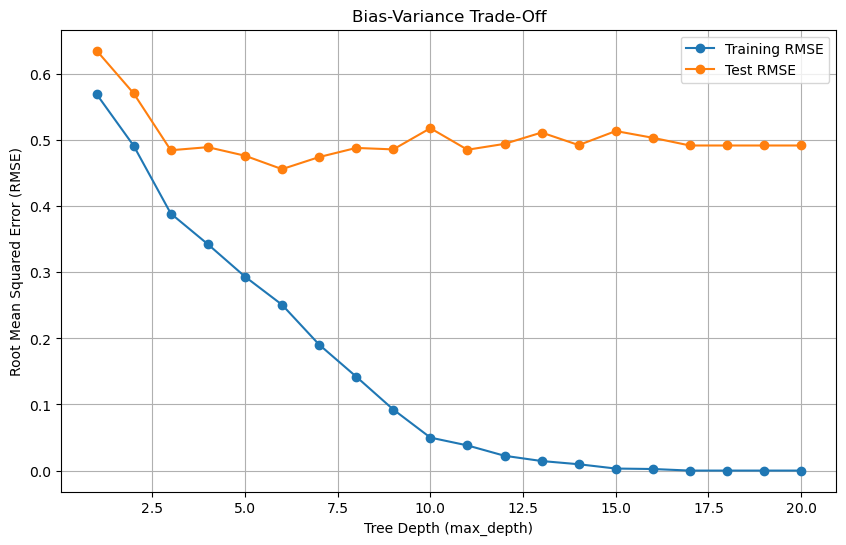

Depth 1 -> Train RMSE: 0.5690, Test RMSE: 0.6349
Depth 2 -> Train RMSE: 0.4910, Test RMSE: 0.5702
Depth 3 -> Train RMSE: 0.3886, Test RMSE: 0.4843
Depth 4 -> Train RMSE: 0.3422, Test RMSE: 0.4889
Depth 5 -> Train RMSE: 0.2933, Test RMSE: 0.4760
Depth 6 -> Train RMSE: 0.2507, Test RMSE: 0.4557
Depth 7 -> Train RMSE: 0.1905, Test RMSE: 0.4740
Depth 8 -> Train RMSE: 0.1420, Test RMSE: 0.4878
Depth 9 -> Train RMSE: 0.0923, Test RMSE: 0.4856
Depth 10 -> Train RMSE: 0.0499, Test RMSE: 0.5176
Depth 11 -> Train RMSE: 0.0380, Test RMSE: 0.4850
Depth 12 -> Train RMSE: 0.0224, Test RMSE: 0.4939
Depth 13 -> Train RMSE: 0.0144, Test RMSE: 0.5110
Depth 14 -> Train RMSE: 0.0096, Test RMSE: 0.4921
Depth 15 -> Train RMSE: 0.0031, Test RMSE: 0.5133
Depth 16 -> Train RMSE: 0.0024, Test RMSE: 0.5031
Depth 17 -> Train RMSE: 0.0000, Test RMSE: 0.4914
Depth 18 -> Train RMSE: 0.0000, Test RMSE: 0.4914
Depth 19 -> Train RMSE: 0.0000, Test RMSE: 0.4914
Depth 20 -> Train RMSE: 0.0000, Test RMSE: 0.4914


In [133]:
# List of possible depths to test
depth_range = range(1, 21)

# Arrays to store the training and test errors
train_errors = []
test_errors = []

# Loop through different max_depth values
for depth in depth_range:
    # Train the model with a specific depth
    regressor0 = DecisionTreeRegressor(max_depth=depth, random_state=0)
    regressor0.fit(X_train, y_train)

    # Predict on the training and test set
    y_train_pred0 = regressor0.predict(X_train)
    y_test_pred0 = regressor0.predict(X_test)

    # Calculate errors
    train_rmse0 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred0))
    test_rmse0 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred0))

    # Store the errors
    train_errors.append(train_rmse0)
    test_errors.append(test_rmse0)

# Plot training and test RMSE to find the balance
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_errors, label='Training RMSE', marker='o')
plt.plot(depth_range, test_errors, label='Test RMSE', marker='o')
plt.xlabel('Tree Depth (max_depth)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Bias-Variance Trade-Off')
plt.legend()
plt.grid(True)
plt.show()

# Print the depths and errors for reference
for depth, train_err, test_err in zip(depth_range, train_errors, test_errors):
    print(f"Depth {depth} -> Train RMSE: {train_err:.4f}, Test RMSE: {test_err:.4f}")

In [145]:
# Based on the plot, Depth 6 might be the best choice, as it shows a good balance between low training error and low test error. 